<a href="https://colab.research.google.com/github/TomR1ddle/HPC/blob/main/AmazonGo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os
train_image_files_path = "/content/drive/My Drive/ComputerVision-AmazonGo/Data/Train/"
valid_image_files_path = "/content/drive/My Drive/ComputerVision-AmazonGo/Data/Validation/"


In [4]:
label = ['BanhMy', 'BiaNuocNgot', 'HoaQua', 'Rau']


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_gen = ImageDataGenerator(rescale=1./255)  # Đọc và chuẩn hóa dữ liệu ảnh về 0-1
validation_data_gen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,  # Đường dẫn tới ảnh huấn luyện
    target_size=(50, 50),  # Biến đổi các ảnh huấn luyện về cùng một kích thước [50x50]
    class_mode='categorical'  # Phân loại ảnh đa lớp (4 lớp)
)
validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(50, 50),
    class_mode='categorical'
)

Found 42 images belonging to 4 classes.
Found 5 images belonging to 4 classes.


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

model = tf.keras.models.Sequential()
#lớp CNN1
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(50,50,3)))
model.add(MaxPooling2D(2,2))

#lớp CNN2
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512, activation=tf.nn.relu))
model.add(Dense(4, activation=tf.nn.softmax))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
from tensorflow.keras.optimizers import RMSprop

# Pass learning rate using 'learning_rate' instead of 'lr'
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['acc'])

In [9]:
EPOCHS = 100
history = model.fit(
    train_generator,
    steps_per_epoch=2,
    epochs=EPOCHS,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=2
)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - acc: 0.4524 - loss: 1.8168 - val_acc: 0.2000 - val_loss: 1.9599
Epoch 2/100


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.2000 - val_loss: 1.9599
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 288ms/step - acc: 0.3238 - loss: 1.4848 - val_acc: 0.2000 - val_loss: 1.3173
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.2000 - val_loss: 1.3173
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 319ms/step - acc: 0.3079 - loss: 1.3124 - val_acc: 0.4000 - val_loss: 1.4074
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.4000 - val_loss: 1.4074
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 320ms/step - acc: 0.5175 - loss: 1.1439 - val_acc: 0.6000 - val_loss: 1.0815
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - acc: 0.0000e+00 - loss: 0.0000e+00 - val_acc: 0.6000 - val_loss: 1.0815
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 292ms/step - acc: 0.6952 - loss: 0.9754 - val_acc: 0.2000 - val_loss: 1.4663
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 319

Saving 2.jpg to 2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
[[0. 1. 0. 0.]]
Giá trị dự đoán:  BiaNuocNgot


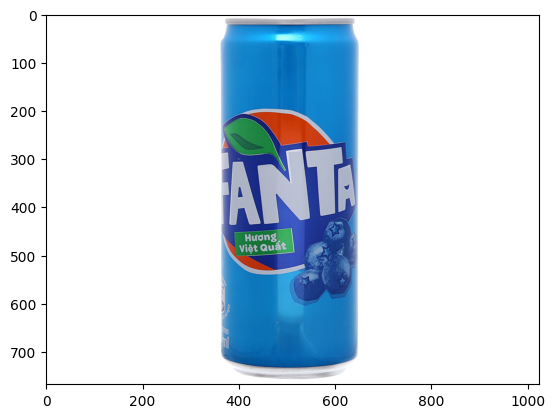

In [10]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

uploaded = files.upload()

for fn in uploaded.keys():
    # Predicting images
    path = '/content/' + fn
    # In ảnh đọc được
    plt.imshow(mpimg.imread(path))

    img = image.load_img(path, target_size=(50, 50))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    y_predict = model.predict(images, batch_size=10)
    print(y_predict)

    print('Giá trị dự đoán: ', label[np.argmax(y_predict)])